# NST Preprocessing Experiment (NPE):
## LDA model from raw dataset

Generating a Latent Dirichlet Allocation (LDA) model from the raw dataset.

In [18]:
# Imports
import os
import random
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from pprint import pprint

from src.utils.file_management import (
    ROOT_PATH,
    load_subtitles,
    write_topics_file)

from src.utils.tables_and_plots import (
    display_n_wordclouds,
    create_wordcloud
)

NST_SAMPLE_SIZE = 1000
NUM_TOPICS = 3
PIPELINE = "unprocessed"

In [10]:
# Load preprocessed CSV file
folder_path_data = r"nst_preprocessing_experiment/preprocessed_data"
file_name_data = f"npe_{NST_SAMPLE_SIZE}_{PIPELINE}"

subtitled_programs = load_subtitles(folder_path_data, file_name_data)

In [11]:
example_program_id = random.choice(list(subtitled_programs.keys()))
example_program_slice = 5
subtitled_programs[example_program_id][:example_program_slice]

['Det', 'var', 'surt!', 'Oi', '']

In [12]:
# Create corpora
texts = subtitled_programs.values()

# Create dictionaries of the words from the subtitles
id2word = corpora.Dictionary(texts)

# Construct the TDFs (Term Document Frequencies) for each text
corpus = {}
for (program_id, subtitle) in subtitled_programs.items():
    corpus[program_id] = id2word.doc2bow(subtitle)

In [19]:
# Creating/loading model from dataset

folder_path_model = r"nst_preprocessing_experiment/models/lda"
file_name_model = f"npe_{NST_SAMPLE_SIZE}_{PIPELINE}_lda_{NUM_TOPICS}_topics"
file_path = os.path.join(ROOT_PATH, folder_path_model, PIPELINE, file_name_model)

lda = None

if os.path.exists(file_path):
    lda = LdaMulticore.load(file_path)
else:
    lda = LdaMulticore(corpus=list(corpus.values()), id2word=id2word, num_topics=NUM_TOPICS)
    #LdaMulticore.save(lda, file_path)

In [20]:
# Print top 5 topics with keywords
pprint(lda.print_topics(5))

[(0,
  '0.036*"" + 0.022*"er" + 0.018*"det" + 0.017*"i" + 0.017*"har" + 0.017*"-" + '
  '0.016*"og" + 0.014*"en" + 0.014*"på" + 0.013*"å"'),
 (1,
  '0.034*"" + 0.028*"er" + 0.023*"-" + 0.021*"i" + 0.018*"det" + 0.017*"og" + '
  '0.015*"på" + 0.014*"Det" + 0.012*"har" + 0.011*"ikke"'),
 (2,
  '0.032*"er" + 0.024*"" + 0.022*"det" + 0.022*"i" + 0.019*"-" + 0.015*"på" + '
  '0.014*"å" + 0.014*"og" + 0.013*"har" + 0.012*"Det"')]


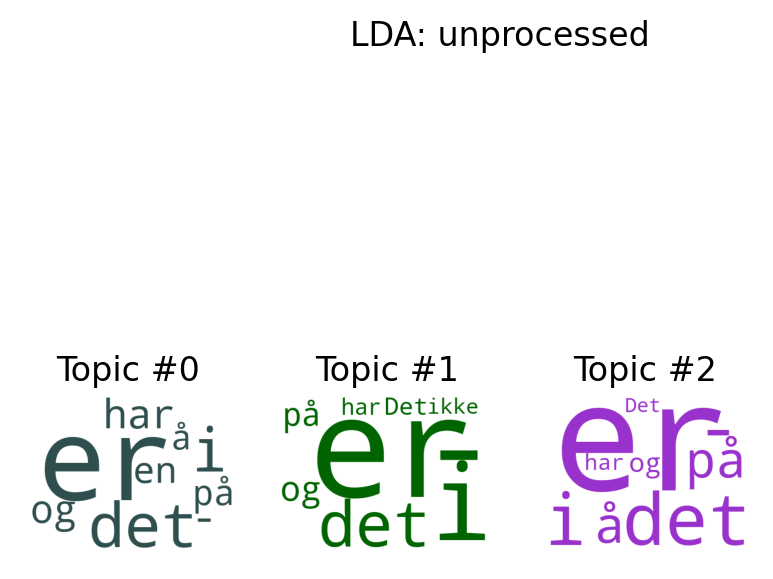

In [21]:
display_n_wordclouds([dict(lda.show_topic(i)) for i in range(NUM_TOPICS)], "LDA: " + PIPELINE, NUM_TOPICS, dpi=200)

In [9]:
folder_path_word_cloud = f"nst_preprocessing_experiment/results/word_clouds/lda/{PIPELINE}"

for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(lda.show_topic(i)))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [10]:
# Save topic words of model to file

topics = lda.show_topics(num_words=20, formatted=False)
topic_words = []
for i in range(len(topics)):
    topic_word_list = []
    for j in range(len(topics[i][1])):
        topic_word_list.append(topics[i][1][j][0])
    topic_words.append((i, topic_word_list))

folder_path_topics = r"nst_preprocessing_experiment/results/topics/"
file_name_topics = file_name_data

write_topics_file(folder_path_topics, file_name_topics, topic_words, model="lda", num_lda_topics=NUM_TOPICS)